# Devoir maison 2

Dans ce notebook, vous allez (1) vous familiariser d'avantage avec la méthode d'Euler pour résoudre numériquement des équations différentielles, et (2) utiliser cette méthode pour intégrer (ou résoudre) les équations du modèle FitzHugh-Nagumo pour déterminer la courbe f-I du modèle.

###  1: La méthode d'Euler

Cette semaine, nous avons vu comment intégrer une équation différentielle avec la méthode d'Euler. De manière générale, un peut formuler une équation différentielel ordinaire de cette forme, où $x=x(t)$ est notre variable dynamique (dont nous voulons connaître l'évolution) :

$$ \frac{dx}{dt} = f(x,t)  $$

L'exemple utilisé dans le cours était assez simple, pour qu'on puisse comparer la solution analytique exacte au résultat de notre intégration numérique, nécessairement approximative. Avec $f(x,t) = -x/\tau$ (ici, $\tau$ est une constante de temps), et une valeur initiale $x(t=0)=x_0$, la solution de notre équation différentielle, c'est-à-dire l'évolution de notre système dynamique, est donnée par $x(t)=x_0 e^{-t/\tau}$. 

Cependant, la fonction $f(x,t)$, qui gouverne l'évolution de $x(t)$ peut être plus compliquée et par exemple dépendre explicitement du temps, par ex. quand une force externe agit sur le système. On va regarder un tel cas dans cette exercise.  

#### Exercise 1.1 

Intégrez numériquement l'équation différentielle 

$$ \frac{dx}{dt} = \sin(\omega t) $$

avec la condition initiale $x(t=0)=0$ et pour la fréquence d'oscillation $\omega = 2\pi$., Si vous connaissez la solution analytique, plottez-là ensemble avec votre solution numérique pour $t\le3$. Dans ce cas, la dérivée temporelle de $x(t)$ est donc donnée par la fonction $f(x,t)=\sin(\omega t) $. 

**Attention :** Veillez à vérifier que le pas de temps que vous utilisez est suffisamment petite pour que l'intégration numérique est correcte. 

**Rappel :** La valeur de $\pi$ est accessible dans la variable `np.pi`. 


In [1]:
# Importer toutes les modules nécessaires
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
# Choisissez un pas de temps approprié
T = 30. # durée sur laquelle intégrer
dt = 0.01
t = np.arange(0,T,dt)
nt = len(t)

In [9]:
# Définissez le fonction qui vous retourne f(x,t)

def f(x,t):
    return np.sin(2*np.pi*t)

In [10]:
# Déterminez de manière itérative les valeurs de x(t)

x = np.zeros(nt)
for i in range(nt-1):
    x[i+1] = x[i] + dt*f(x[i],t[i])

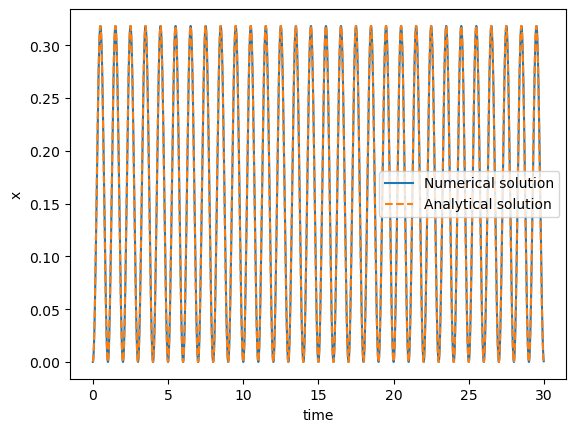

In [11]:
# Plottez x(t) vs. t (si vous connaissez la solution analytique,
# plottez-la pour comparaison)

x_analytical = (1-np.cos(2*np.pi*t))/(2*np.pi)

fig, ax = plt.subplots()
ax.plot(t, x, label='Numerical solution')
ax.plot(t, x_analytical, ls='--', label='Analytical solution')
ax.set_xlabel('time')
ax.set_ylabel('x')
ax.legend()

#### Exercise 1.2

Répétez l'intégration pour deux autres fréquences ($\omega=\pi,\ \omega=3\pi)$  et plottez les différentes solutions ensemble.

**Astuce :** Vous pouvez redefinir votre fonction qui vous retourne la dérivée afin qu'elle prenne la fréquence d'oscillation comme argument supplémentaire.

In [12]:
def f(x,t,omega=2*np.pi):
    return np.sin(omega*t)


# array with values of omega
omegas = np.pi*np.arange(1,4)
n = len(omegas)



# Version 1: une simple boucle sur les omegas
# -------------------------------------------

# liste pour garder les différentes solutions
xliste = []
# itération
for omega in omegas:
    x = np.zeros(nt)
    for i in range(nt-1):
        x[i+1] = x[i] + dt*f(x[i],t[i],omega)
    
    xliste.append(x)


# Version 2: utiliser la puissance des arrays
# -------------------------------------------

# création d'un array 2D (c.à.d., une matrice nt x n)
# où chaque rangée correspond à une valeur de omega 
# et les colonnes à des temps 
xarray = np.zeros((n,nt))

# itération
for i in range(nt-1):
    # une seule opération nécessaire !
    xarray[:,i+1] = xarray[:,i] + dt*f(xarray[:,i],t[i],omegas)
    

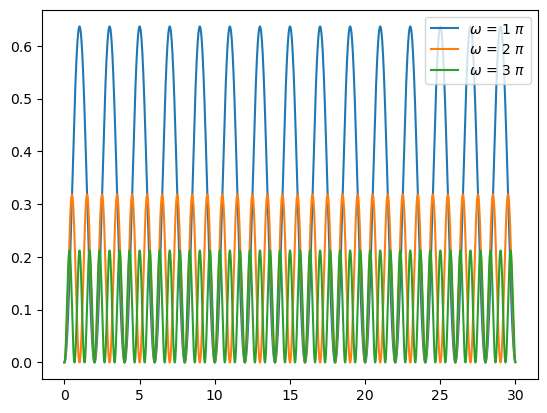

In [13]:
fig, ax = plt.subplots()
for i in range(n):
    ax.plot(t, xliste[i], label=r'$\omega$ = %g $\pi$'%(omegas[i]/np.pi))
    #ax.plot(t, xarray[i], label=r'$\omega$ = %g $\pi$'%(omegas[i]/np.pi))
ax.legend()

#### Exercise 1.3

Intégrez numériquement l'équation différentielle suivante, qui inclut maintenant un terme d'amortissage :

$$ \frac{dx}{dt} = - x + \sin(2\pi t) $$

avec la condition initiale $x(t=0)=0$. Plottez ce résultat avec amortissage ensemble avec le premier résultat 1.1, c'est-à-dire avec la même fréquence mais sans amortissage.

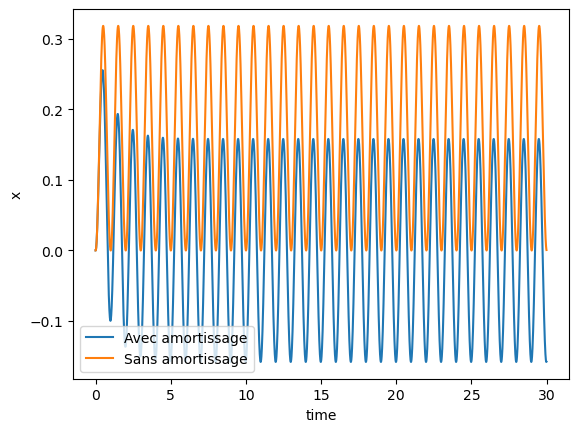

In [14]:
def f(x,t,omega=2*np.pi):
    return - x + np.sin(omega*t)

x = np.zeros(nt)
for i in range(nt-1):
    x[i+1] = x[i] + dt*f(x[i],t[i])

fig, ax = plt.subplots()
ax.plot(t, x, label='Avec amortissage')
ax.plot(t, xarray[1], label='Sans amortissage')
ax.set_xlabel('time')
ax.set_ylabel('x')
ax.legend()

### 2: Extraire des franchissements de seuil 

Il est souvent nécessaire d'extraire le moment du franchissement d'un seuil dans des données, par ex. dans une trace de potentiel membranaire. Souvent, on identifie ainsi les moments de "spike"/PA pour des enregistrements electrophysiologiques. Notamment dans cette situation, on est seulement intéressé par les franchissements "du bas vers le haut" ; le moment de repolarisation est moins important et de toute manière étroitement lié au premier.

Pour un array ou une liste de valeurs, cela revient à identifier l'*index* pour lequel un seuil est franchie. Il faut alors comparer chaque valeur dans la liste avec la valeur suivante, et vérifier si, quand les premier est en-dessous du seuil, le suivant est au-dessus. 

#### Exercise 2.1 

Lisez et exécutez l'exemple ci-dessous. Je vous montre deux implémentations, vous devriez par la suite être capable d'en utiliser au moins une. 

Text(0.5, 0, 't')

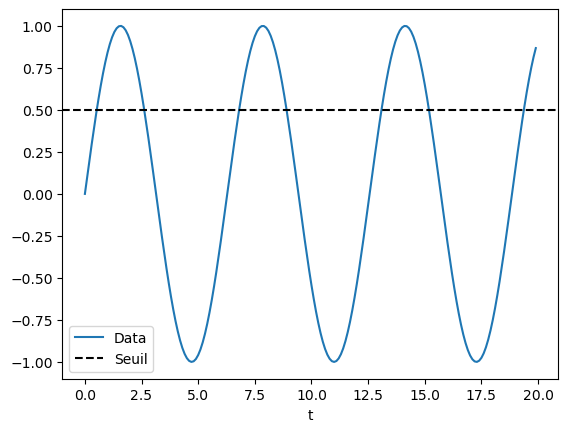

In [15]:
# Exemple d'extraction de franchissement de seuil

# création de données pour l'exemple
t_data = np.arange(0,20,0.1)
data = np.sin(t_data)
ndata = len(data)

# définition du seuil
threshold = 0.5

# plot des données et du seuil
fig, ax = plt.subplots()
ax.plot(t_data, data, label='Data')
ax.axhline(threshold, linestyle='--', color='k', label='Seuil')
ax.legend()
ax.set_xlabel('t')

In [16]:
# implémentation 1: boucle for
# ----------------------------

# liste vide pour prendre les indices de franchissement
indices = [] 

# boucle sur ndata-1 premières valeurs 
# (la dernière valeur ne peut pas être comparée)
for i in range(ndata-1):
    if data[i] < threshold:
        if data[i+1] >= threshold:
            indices.append(i)

print(indices, type(indices))

[5, 68, 130, 193] <class 'list'>


In [17]:
# implémentation 2: utiliser les opérations 
# logiques avec les arrays
# -----------------------------------------

# première condition: déterminer un array avec 
# les valeurs booléennes (True ou False) en 
# fonction de la comparaison avec le seuil,
# pour i=0,...,ndata-2
condition_1 = data[:-1] < threshold

# deuxième condition: déterminer un array avec 
# les valeurs booléennes (True ou False) en 
# fonction de la comparaison avec le seuil,
# pour i=1,...,ndata-1
condition_2 = data[1:] >= threshold

# quand les deux conditions sont remplies, 
# le seuil est franchie!
# (la multiplication de valeurs boléennes 
# correspond à l'opération logique ET/AND)
both = condition_1 * condition_2

# les indices du franchissement sont ceux pour 
# qui les deux conditions sont 'True'
# --> on peut utuliser la fonction np.where
indices_alt = np.where(both)[0]

print(indices_alt, type(indices_alt))

[  5  68 130 193] <class 'numpy.ndarray'>


In [18]:
# Les temps des franchissements sont donnés 
# par les temps qui correspondent aux indices :
print('Temps de franchissements :', t_data[indices])

Temps de franchissements : [ 0.5  6.8 13.  19.3]


### 3: Le modèle de FitzHugh-Nagumo

Dans le TD de cette semaine, nous avons étudié le modèle FitzHugh-Nagumo, qui décrit de manière simplifiée la décharge neuronale. Le modèle est spécifié par les équations 


$$ \frac{dV}{dt} = V - V^3/3 - W + I ,$$

$$ \frac{dW}{dt} = 0.08 (V+ 0.7 - 0.8 W), $$


Nous avons constaté qu'en fonction du courant $I$ injecté, le neurone décharge (génére des pics de potentiel $V$) ou reste silencieux (les variables ne varient pas dans le temps, après une rélaxation intitiale). 

#### Exercise 3.1 : Détermination de la courbe f-I

Essayez d'extraire le nombre de PA de la trace du potentiel (de la variable $V$) pour une simulation d'une durée `T = 1000` pour plusiers valeurs de $I$ dans l'intervalle $I\in[0,1.5]$, `Ivalues = np.arange(0,1.51,0.05)`. Tracez le nombre des décharges (i.e., des franchissements de seuil) en fonction du courant $I$. Pour éviter des PA singulier uniquement dus aux conditions initiales, choisissez des valeurs initiales $V(t=0)=-1$, $W(t=0)=0$.

**Indice :** Identifiez un seuil de $V$ raisonnable au-dessus lequel un PA peut être considéré comme déclenché, et déterminez le nombre de franchissements de ce seuil par le bas vers le haut.

**Astuce :** Vous pouvez réutiliser le code du TD pour la résolution du modèle FitzHugh-Nagumo, avec une boucle sur les courants `I`. Vous pouvez également réutiliser le code ci-dessus pour la détection du franchissement du seil en l'adaptant au problème (attention, nous cherchons les franchissements pour la variable $V$ seulement). 

In [22]:
# import supplémentaire pour odeint 
# (si utilisé)
from scipy.integrate import odeint

# dérivée en forme vectorielle
# (array) pour y = [V,W]

def f(y, t=None, I=0.):
    V, W = y
    dVdt = V - V**3/3 - W + I
    dWdt = 0.08*(V + 0.7 - 0.8*W)
    return np.array([dVdt, dWdt])
    
    
# paramètres d'intégration

T = 1000
dt = 0.01
t = np.arange(0,T,dt)
nt = len(t)

threshold = 0.5

Ivalues = np.arange(0,1.51,0.05)
nI = len(Ivalues)

nb_spikes = np.zeros(nI)

for i in range(nI):
    
    # Version 1: Euler integration
    # ----------------------------
    # array vide pour y(t) (V(t), W(t))
    y = np.zeros((nt,2))
    
    # condiction initiale pour V
    y[0,0] = -1
    
    # itération
    for j in range(nt-1):
        y[j+1] = y[j] + dt*f(y[j],t[j],Ivalues[i])
        
    ## Version 2: using odeint
    ## -----------------------
    #
    ## condiction initiale pour V, W
    #y0 = [-1,0]
    
    ## itération
    #y = odeint(f,y0,t,args=(Ivalues[i],))
     
    # franchissements de seuil: utiliser V(t) = y[:,0]
    crossings = (y[1:,0]>threshold) * (y[:-1,0]<=threshold)
    
    # number of crossings given by number of places
    # where condition is True -> when summed, each True
    # is counted as 1, each False is counted as 0
    nb_spikes[i] = sum(crossings)
    

rates = nb_spikes/T

Text(0, 0.5, 'firing rate')

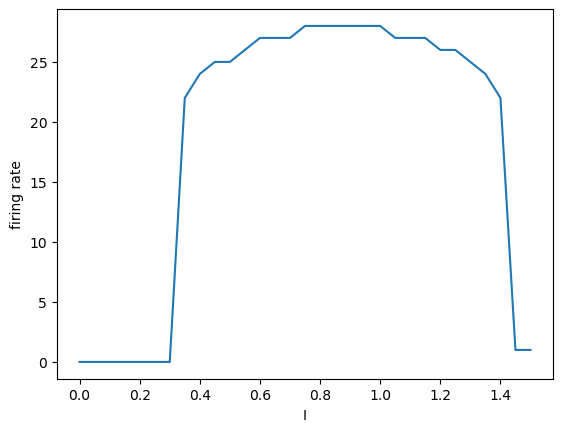

In [23]:
fig, ax = plt.subplots()
ax.plot(Ivalues, nb_spikes)
ax.set_xlabel('I')
ax.set_ylabel('firing rate')

Text(0, 0.5, 'W')

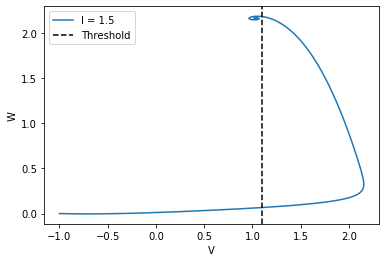

In [27]:
fig, ax = plt.subplots()
ax.plot(y[:,0], y[:,1], label='I = %g'%Ivalues[i])
ax.axvline(threshold,ls='--',c='k',label='Threshold')
ax.legend()
ax.set_xlabel('V')
ax.set_ylabel('W')

On s'aperçoit qu'il y a une transition abrupte, avec une valeur de $I$ critique au-dessus laquelle le neurone commence à décharger avec une fréquence 'minimale' dans le sens qu'elle ne peut pas devenir arbitrairement petite on s'approchant d'avantage de la valeur critique. 

Pour des valeurs de I très importantes (I>1.4), le modèle atteint un autre point fixe et n'oscille (décharge) plus.